In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [56]:
df = pd.read_csv('S02-hw-dataset.csv')

In [57]:
df.head()

,user_id,age,country,purchases,revenue
0,1,25.0,FR,7,749
1,2,24.0,RU,5,1115
2,3,52.0,FR,7,399
3,4,31.0,RU,6,654
4,5,NaN,DE,6,1296


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   user_id    41 non-null     int64  
 1   age        39 non-null     float64
 2   country    41 non-null     object 
 3   purchases  41 non-null     int64  
 4   revenue    41 non-null     int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 1.7+ KB


In [59]:
df.tail()

,user_id,age,country,purchases,revenue
36,37,18.0,DE,4,1104
37,38,35.0,DE,3,738
38,39,39.0,FR,7,1162
39,40,34.0,RU,7,2086
40,10,24.0,RU,7,511


In [60]:
df.describe()

,user_id,age,purchases,revenue
count,41.000000,39.000000,41.000000,41.000000
mean,20.243902,36.512821,4.829268,820.048780
std,11.659289,18.304259,2.710189,613.127269
min,1.000000,5.000000,-1.000000,0.000000
25%,10.000000,24.000000,3.000000,432.000000
50%,20.000000,33.000000,5.000000,693.000000
75%,30.000000,45.500000,7.000000,1115.000000
max,40.000000,120.000000,11.000000,2475.000000


In [61]:
print(df.min())
print('---')
print(df.max())

user_id        1
age          5.0
country       CN
purchases     -1
revenue        0
dtype: object
---
user_id         40
age          120.0
country         US
purchases       11
revenue       2475
dtype: object


In [62]:
df['age'].mean()

36.51282051282051

In [63]:
df.isna().mean() * 100

user_id      0.000000
age          4.878049
country      0.000000
purchases    0.000000
revenue      0.000000
dtype: float64

In [64]:
df.duplicated()

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
30    False
31    False
32    False
33    False
34    False
35    False
36    False
37    False
38    False
39    False
40     True
dtype: bool

In [65]:
df.duplicated().sum()

1

In [66]:
df[df.duplicated(keep=False)]

,user_id,age,country,purchases,revenue
9,10,24.0,RU,7,511
40,10,24.0,RU,7,511


In [67]:
df[df['purchases'] < 0]

,user_id,age,country,purchases,revenue
5,6,120.0,FR,-1,785


In [68]:
df[df['age'] > 100]

,user_id,age,country,purchases,revenue
5,6,120.0,FR,-1,785


In [69]:
df[df['age'] < 18]

,user_id,age,country,purchases,revenue
20,21,5.0,RU,8,1488


In [70]:
df[(df['purchases'] == 0) & (df['revenue'] > 0)]

,user_id,age,country,purchases,revenue


В столбике age присутствуют 2 пропуска. Так же есть одна дублирующая себя строка. Присутствует запись с мало реальным возрастом 120 и наоборот 5.

In [71]:
df['country'].value_counts()

country
RU    13
FR    12
US     8
DE     6
CN     2
Name: count, dtype: int64

In [72]:
df.groupby('country')['revenue'].mean()

country
CN    1054.000000
DE    1445.500000
FR     675.916667
RU     790.076923
US     557.375000
Name: revenue, dtype: float64

In [73]:
df.groupby('country')['purchases'].mean()

country
CN    4.500000
DE    6.500000
FR    4.250000
RU    4.769231
US    4.625000
Name: purchases, dtype: float64

In [74]:
df.groupby('country').agg({'revenue': 'sum', 'purchases': 'sum'})

,revenue,purchases
country,,
CN,2108,9
DE,8673,39
FR,8111,51
RU,10271,62
US,4459,37


In [75]:
df['age_group'] = pd.cut(df['age'], bins=[0, 25, 40, 60, 150], labels=['18-25', '26-40', '41-60', '60+'])

In [76]:
df['age_group'].value_counts()

age_group
26-40    14
18-25    12
41-60    12
60+       1
Name: count, dtype: int64

In [77]:
df.groupby('age_group')['revenue'].mean()

/tmp/ipykernel_41325/1175627127.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('age_group')['revenue'].mean()


age_group
18-25     700.666667
26-40    1065.357143
41-60     632.333333
60+       785.000000
Name: revenue, dtype: float64

Преобладают пользователи России и франции. В России и франции средний доход, самый мысокий это германия, самый низкий это китай и сша. Преобладает возрастная группа 18-40. Пользователи 60+ отсутсвуют, есть один кому 120, что мало вероятно в наше время.

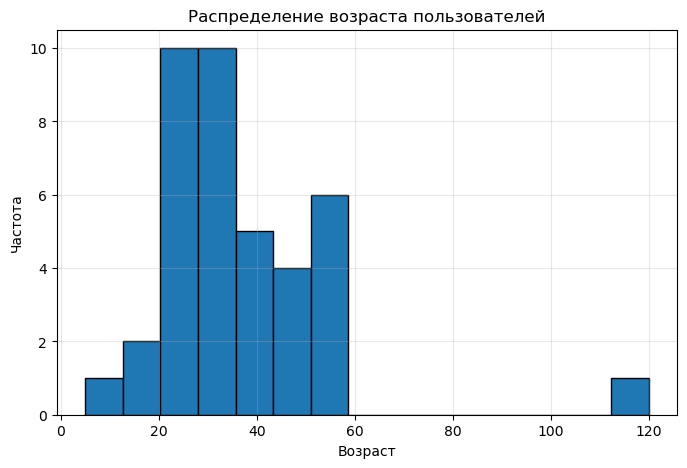

In [78]:
plt.figure(figsize=(8, 5))
plt.hist(df['age'].dropna(), bins=15, edgecolor='black')
plt.xlabel('Возраст')
plt.ylabel('Частота')
plt.title('Распределение возраста пользователей')
plt.grid(alpha=0.3)
plt.show()

/tmp/ipykernel_41325/3274770296.py:2: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([df[df['country'] == country]['revenue'].values for country in df['country'].unique()],


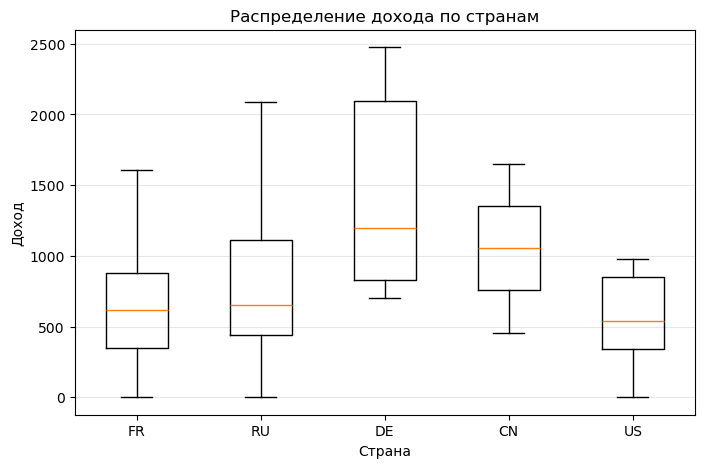

In [79]:
plt.figure(figsize=(8, 5))
plt.boxplot([df[df['country'] == country]['revenue'].values for country in df['country'].unique()],
            labels=df['country'].unique())
plt.xlabel('Страна')
plt.ylabel('Доход')
plt.title('Распределение дохода по странам')
plt.grid(alpha=0.3, axis='y')
plt.show()

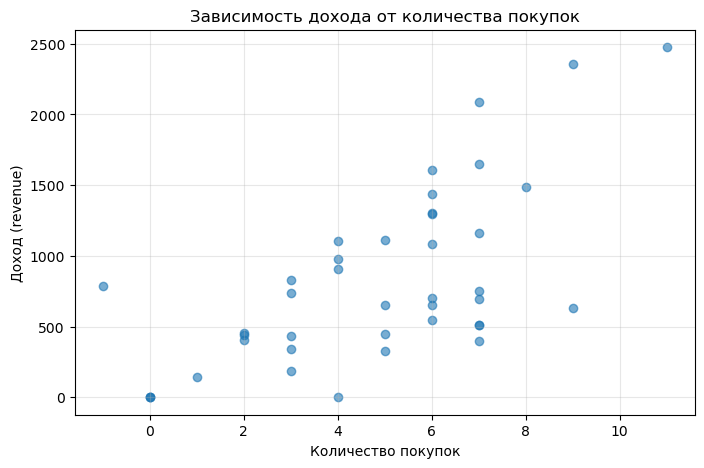

In [80]:
plt.figure(figsize=(8, 5))
plt.scatter(df['purchases'], df['revenue'], alpha=0.6)
plt.xlabel('Количество покупок')
plt.ylabel('Доход (revenue)')
plt.title('Зависимость дохода от количества покупок')
plt.grid(alpha=0.3)
plt.show()

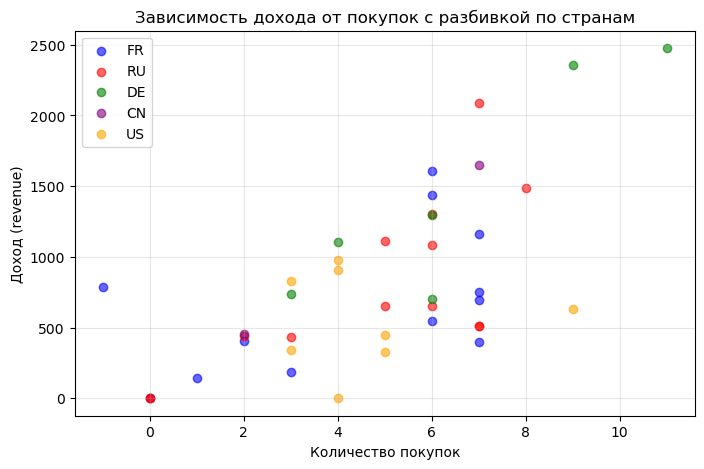

In [81]:
plt.figure(figsize=(8, 5))
colors = {'FR': 'blue', 'RU': 'red', 'DE': 'green', 'US': 'orange', 'CN': 'purple'}
for country in df['country'].unique():
    data = df[df['country'] == country]
    plt.scatter(data['purchases'], data['revenue'], alpha=0.6, label=country, c=colors[country])
plt.xlabel('Количество покупок')
plt.ylabel('Доход (revenue)')
plt.title('Зависимость дохода от покупок с разбивкой по странам')
plt.legend()
plt.grid(alpha=0.3)
plt.savefig('figures/scatter_purchases_revenue.png', dpi=100, bbox_inches='tight')
plt.show()

Вывод из гистограммы возраста можно сделать такой, что большинство пользователей находится в рамках 20-50 лет, есть 2 выброса 5 и 120 лет. Так же прослеживается положительная корреляция между количеством покупок и доходом, ео есть и исключения, например точка с высоким доходом при малом кол-ве покупок.